# **Bank Customer Churn (이진분류) 분석, 머신러닝, 딥러닝 모델 생성**

In [ ]:
import pandas as pd
import numpy as np

# 데이터 로드(3개)
df = pd.read_csv('Bank Customer Churn Prediction.csv', encoding='utf-8')

print(df.info())

print(df.head(100))
print(df.tail(100))
# 필요한 칼럼들만을 이용해서 DataFrame 재구성
df = df.drop(columns=['customer_id'])

# 불완전한 데이터 확인
print(df.isna().sum())
# 결측 데이터 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None
    customer_id  credit_score  country  gender  age  tenure    balance  \
0      15634602           619   France  Female   42       2       0.00   
1      15647311  

      credit_score  country  gender  age  tenure    balance  products_number  \
1678           570   France  Female   18       4   82767.42                1   
6889           473   France  Female   25       6  110666.42                2   
2118           460   France  Female   27       7       0.00                2   
4865           590   France  Female   29       4       0.00                2   
1691           591    Spain    Male   31       8       0.00                1   
9516           557   France  Female   32       3  123502.53                1   
1804           552   France    Male   33       5  140931.57                1   
1747           586  Germany    Male   34       9   74309.81                1   
4283           725   France    Male   35       7   75915.75                1   
9773           532   France    Male   36       4       0.00                2   
4259           790    Spain  Female   37       3       0.00                3   
8884           686  Germany  Female   38

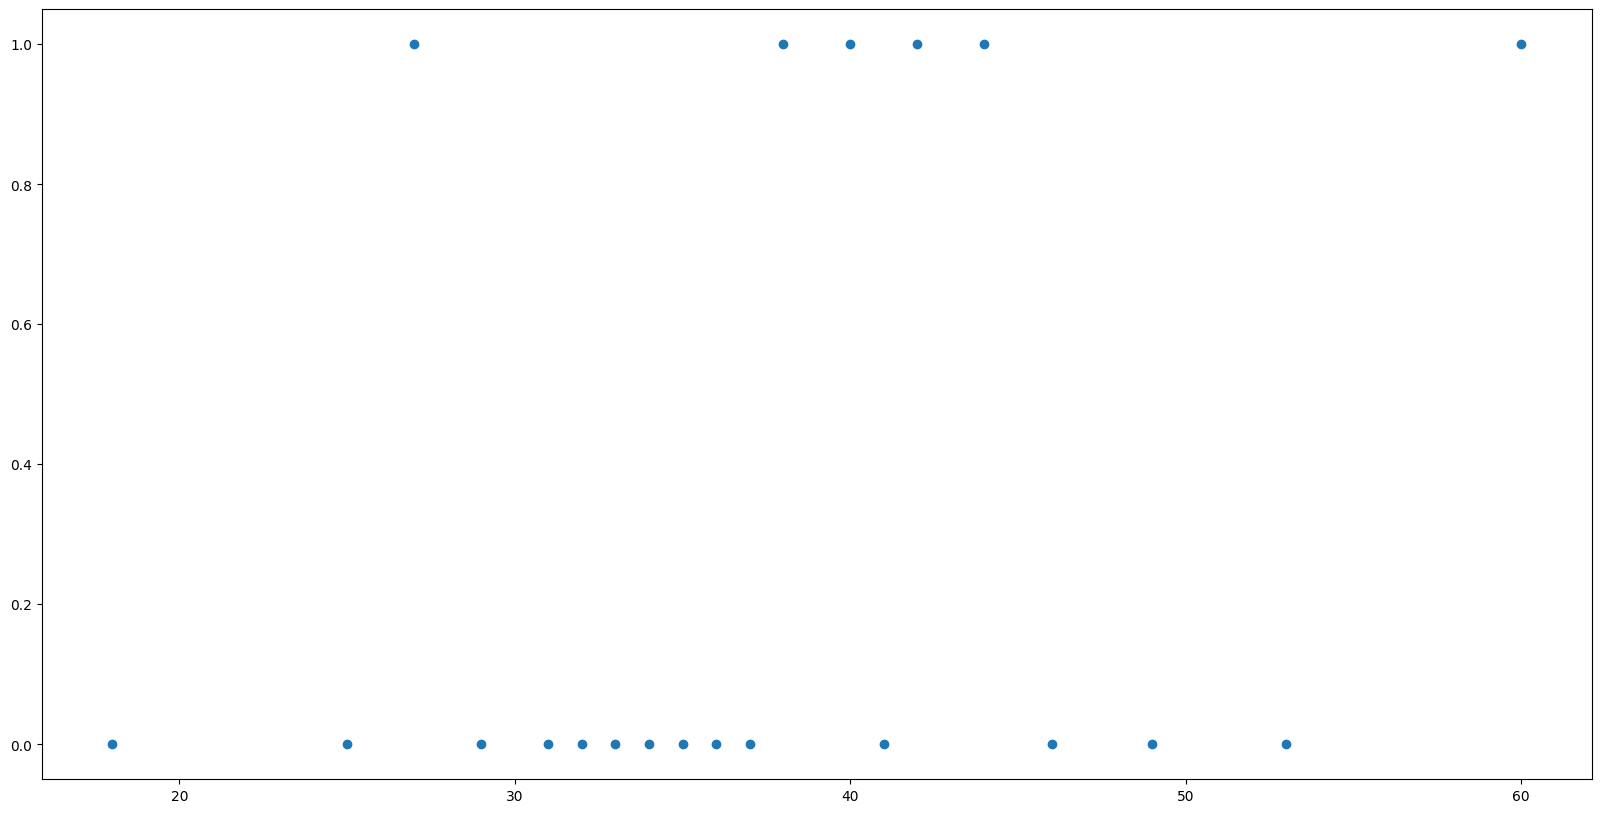

In [ ]:
import matplotlib.pyplot as plt

df_sorted_by_ages = df.sort_values(by=['age'], axis=0)
df_sorted_by_ages_stepped = df_sorted_by_ages.iloc[::500]
print(df_sorted_by_ages_stepped.head(50))

plt.figure(figsize=(20, 10))
plt.scatter(df_sorted_by_ages_stepped['age'].iloc[:], df_sorted_by_ages_stepped['churn'].iloc[:])

plt.show()

# **데이터 인코딩 및 컬럼명 정리**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# feature와 target으로 분리
df_X = df.drop(columns=['churn'])
df_y = df['churn']

# 레이블값에 대한 인코딩 수행
df_X = pd.get_dummies(df_X, drop_first=True)

print(df_X.info())

# Regression 분석을 위한 컬럼명 정리(Regression formula 해석시 컬럼에 공백, 특수문자 등이 포함되어 있으면 오류가 발생)
df_X.columns = df_X.columns.str.replace(' ', '').str.replace('-', '').str.replace('(', '').str.replace(')', '')

print(df_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   products_number   10000 non-null  int64  
 5   credit_card       10000 non-null  int64  
 6   active_member     10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   country_Germany   10000 non-null  bool   
 9   country_Spain     10000 non-null  bool   
 10  gender_Male       10000 non-null  bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 654.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_s

# **데이터를 0 과 1 사이의 값으로 scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = df_X.columns.values
print(features)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df_X)
df_X = pd.DataFrame(scaler.transform(df_X))

print(df_X.columns)
df_X.columns = features
print("$" * 100)
print(df_X)

['credit_score' 'age' 'tenure' 'balance' 'products_number' 'credit_card'
 'active_member' 'estimated_salary' 'country_Germany' 'country_Spain'
 'gender_Male']
RangeIndex(start=0, stop=11, step=1)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
      credit_score       age  tenure   balance  products_number  credit_card  \
0            0.538  0.324324     0.2  0.000000         0.000000          1.0   
1            0.516  0.310811     0.1  0.334031         0.000000          0.0   
2            0.304  0.324324     0.8  0.636357         0.666667          1.0   
3            0.698  0.283784     0.1  0.000000         0.333333          0.0   
4            1.000  0.337838     0.2  0.500246         0.000000          1.0   
...            ...       ...     ...       ...              ...          ...   
9995         0.842  0.283784     0.5  0.000000         0.333333          1.0   
9996         0.332  0.229730     1.0  0.228657         0.000000

# **로지스틱 회귀 요약**

In [ ]:
import statsmodels.formula.api as sfa
import statsmodels.api as sm

# 로지스틱 회귀 분석을 위해 feature와 target으로 분리했던 데이터 임시 합병
full_df = pd.concat([df_X, df_y], axis=1)

# formula 생성 과정
indep_vars = df_X.columns.to_list()
indep_vars_str = ' + '.join(indep_vars)
formula = f"churn ~ {indep_vars_str}"
print(formula)

# 생성한 formula를 이용해 종속변수 ~ 독립변수 식의 파라미터 전달
logis = sm.Logit.from_formula(formula=formula, data=full_df)
result = logis.fit()

print(result.summary())
print('OR')
print(np.exp(result.params))

churn ~ credit_score + age + tenure + balance + products_number + credit_card + active_member + estimated_salary + country_Germany + country_Spain + gender_Male
Optimization terminated successfully.
         Current function value: 0.428068
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Thu, 10 Jul 2025   Pseudo R-squ.:                  0.1532
Time:                        04:17:25   Log-Likelihood:                -4280.7
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------

# **데이터내의 churn 비율 시각화**

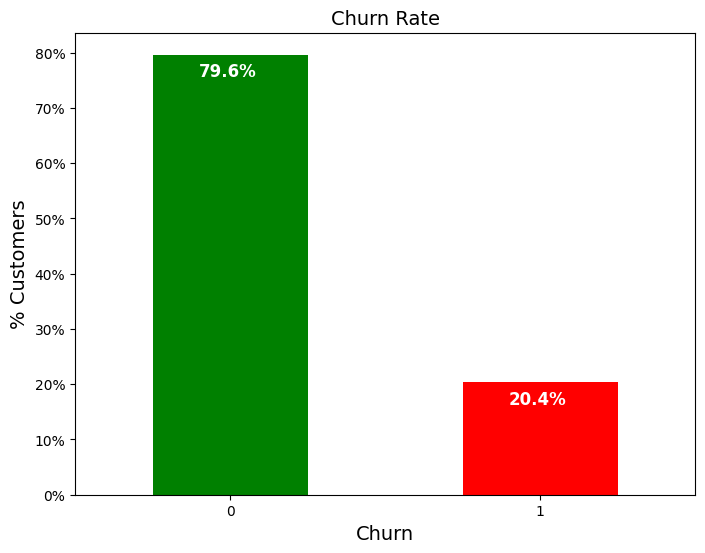

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# colors = ['#4D3425','#E4512B']
colors = ['green','red']
ax = (df['churn'].value_counts()*100.0 /len(df_X)).plot(kind='bar', stacked = True, rot = 0, color = colors, figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0,
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

# **머신러닝 - Logistic Regression 모델**

Linear Regression model accuracy: 0.8063333333333333
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2363
           1       0.63      0.21      0.31       637

    accuracy                           0.81      3000
   macro avg       0.73      0.59      0.60      3000
weighted avg       0.78      0.81      0.77      3000

Axes(0.125,0.11;0.775x0.77)


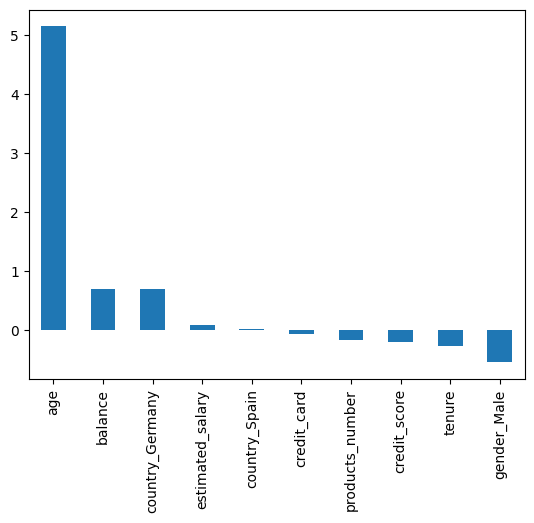

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
# 데이터 셋을 학습, 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=30) # random_state는 30일때가 best
# 모델 정의(로지스틱회귀)
model_LR = LogisticRegression()
# 모델 학습
model_LR.fit(X_train, y_train)
# 모델 검증
pred_LR = model_LR.predict(X_test)

print('Linear Regression model accuracy:', metrics.accuracy_score(y_test, pred_LR))
print(classification_report(y_test, pred_LR))

# 각 계수들의 가중치 시각화
weights = pd.Series(model_LR.coef_[0],
                 index=df_X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

# **머신러닝 - RandomForest 모델**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
# 데이터 셋을 학습, 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=40) # random_state는 40일때가 best

byunsu = 10
predict_list = []
while (byunsu <= 1000):
  # 모델 정의(랜덤포레스트)
  model_RF = RandomForestClassifier(n_estimators=byunsu, oob_score=True)
  # 모델 학습
  model_RF.fit(X_train, y_train)
  # 모델 검증
  pred_RF = model_RF.predict(X_test)

  print(f'n_estimators: {byunsu} | Random Forest model accuracy: {metrics.accuracy_score(y_test, pred_RF)}')
  predict_list.append(metrics.accuracy_score(y_test, pred_RF))
  byunsu = byunsu + 10
  # print(classification_report(y_test, pred_RF))

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


n_estimators: 10 | Random Forest model accuracy: 0.8486666666666667
n_estimators: 20 | Random Forest model accuracy: 0.8493333333333334
n_estimators: 30 | Random Forest model accuracy: 0.8583333333333333
n_estimators: 40 | Random Forest model accuracy: 0.8593333333333333
n_estimators: 50 | Random Forest model accuracy: 0.8586666666666667
n_estimators: 60 | Random Forest model accuracy: 0.8633333333333333
n_estimators: 70 | Random Forest model accuracy: 0.8596666666666667
n_estimators: 80 | Random Forest model accuracy: 0.8603333333333333
n_estimators: 90 | Random Forest model accuracy: 0.8616666666666667
n_estimators: 100 | Random Forest model accuracy: 0.858
n_estimators: 110 | Random Forest model accuracy: 0.8616666666666667
n_estimators: 120 | Random Forest model accuracy: 0.8623333333333333
n_estimators: 130 | Random Forest model accuracy: 0.8623333333333333
n_estimators: 140 | Random Forest model accuracy: 0.858
n_estimators: 150 | Random Forest model accuracy: 0.8606666666666667


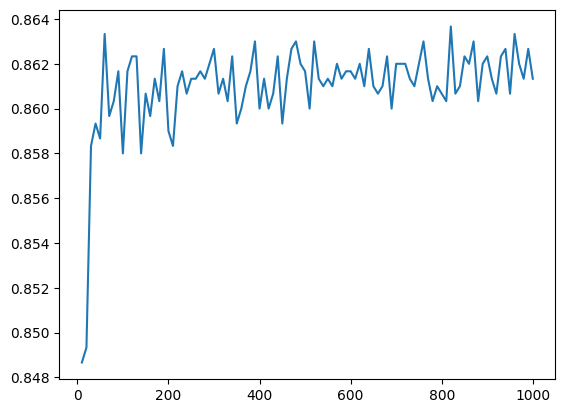

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_values = list(range(10, 1001))
x_values = x_values[::10]
x_values_np = np.array(x_values)

plt.plot(x_values, predict_list)
plt.show()

# **머신러닝 - KNN 모델**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
# 데이터 셋을 학습, 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=50) # random_state는 50일때가 best

window_size = 1
knn_predicts = []
while window_size <= 100:
  # 모델 정의(KNN)
  model_KNN = KNeighborsClassifier(n_neighbors=window_size) # 윈도우사이즈는 100이 적당하군
  # 모델 학습
  model_KNN.fit(X_train, y_train)
  # 모델 검증
  pred_KNN = model_KNN.predict(X_test)

  print(f'n_neighbors: {window_size} | KNN model accuracy: {metrics.accuracy_score(y_test, pred_KNN)}')
  knn_predicts.append(metrics.accuracy_score(y_test, pred_KNN))
  window_size = window_size + 1
  # print(classification_report(y_test, pred_KNN))

n_neighbors: 1 | KNN model accuracy: 0.7773333333333333
n_neighbors: 2 | KNN model accuracy: 0.8053333333333333
n_neighbors: 3 | KNN model accuracy: 0.7966666666666666
n_neighbors: 4 | KNN model accuracy: 0.814
n_neighbors: 5 | KNN model accuracy: 0.807
n_neighbors: 6 | KNN model accuracy: 0.8136666666666666
n_neighbors: 7 | KNN model accuracy: 0.8146666666666667
n_neighbors: 8 | KNN model accuracy: 0.8186666666666667
n_neighbors: 9 | KNN model accuracy: 0.8163333333333334
n_neighbors: 10 | KNN model accuracy: 0.8146666666666667
n_neighbors: 11 | KNN model accuracy: 0.817
n_neighbors: 12 | KNN model accuracy: 0.816
n_neighbors: 13 | KNN model accuracy: 0.817
n_neighbors: 14 | KNN model accuracy: 0.8136666666666666
n_neighbors: 15 | KNN model accuracy: 0.8183333333333334
n_neighbors: 16 | KNN model accuracy: 0.812
n_neighbors: 17 | KNN model accuracy: 0.811
n_neighbors: 18 | KNN model accuracy: 0.8116666666666666
n_neighbors: 19 | KNN model accuracy: 0.8123333333333334
n_neighbors: 20 |

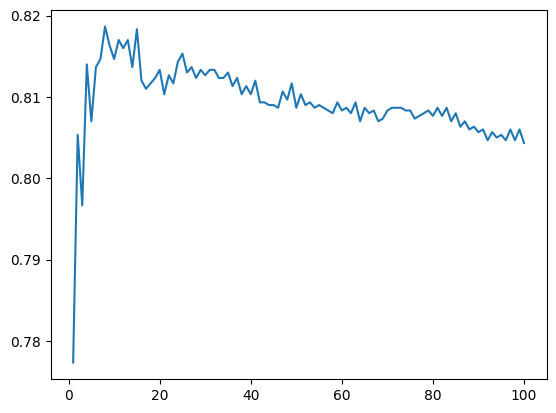

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_values = list(range(1, 101))
x_values_np = np.array(x_values)

plt.plot(x_values, knn_predicts)
plt.show()

# **머신러닝 - SVM 모델**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
# 데이터 셋을 학습, 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=50) # random_state는 50일때가 best
# 모델 정의(SVM)
model_SVM = svm.SVC(kernel='linear')
# 모델 학습
model_SVM.fit(X_train, y_train)
# 모델 검증
pred_SVM = model_SVM.predict(X_test)

print('KNN model accuracy:', metrics.accuracy_score(y_test, pred_SVM))
print(classification_report(y_test, pred_SVM))

# **딥러닝 - 인공신경망을 이용한 DNN 모델**

In [ ]:
# !pip install keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
# 데이터 셋을 학습, 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=50) # random_state는 50일때가 best

# 모델 정의(DNN)
model_DNN = Sequential()
model_DNN.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_DNN.add(Dense(32, activation='relu'))
model_DNN.add(Dense(16, activation='relu'))
model_DNN.add(Dense(8, activation='relu'))
model_DNN.add(Dense(1, activation='sigmoid'))

print(model_DNN.summary())

# 모델 컴파일
model_DNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습 시키기
hist = model_DNN.fit(X_train, y_train, batch_size=30, epochs=70, validation_split=0.2)

# 모델 평가
score_DNN = model_DNN.evaluate(X_test, y_test)
print('DNN score:', score_DNN)

# **최적의 epchos를 찾기위해 epoch에 따른 accuracy 와 loss 시각화**

In [ ]:
import matplotlib.pyplot as plt

#
# 학습 후 metrics = ['accuracy'] 에 대하여 그 결과를 시각화
#
print(hist.history.keys())
# train, val 에 대한 정확도 그래프 그리기
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# train, val 에 대한 로스율 그래프 그리기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **시각화시 한글 폰트 적용**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# **고객 데이터를 생성하여 DNN 모델 예측 테스트**

In [ ]:
# 실험용 데이터를 생성하기 위해 필요한 컬럼들이 무엇이 있는지 알아보기
print(X_train.columns)

X_train.info()

print(X_train.head(3))
print("^" * 100)
print("^" * 100)
print("^" * 100)

# 테스트용 데이터 5명의 가상 고객 데이터 생성
credit_scores = [0.721, 0.342, 0.543, 0.123, 0.798]
ages = [0.2513, 0.3523, 0.4444, 0.5223, 0.6112]
tenures = [0.3, 0.4, 0.6, 0.8, 0.6]
balances = [0.59233, 0.53424, 0.67543, 0.34564, 0.98632]
product_numbers = [0.333333, 0.000000, 0.000000, 0.000000, 0.333333]
credit_cards = [0.0, 1.0, 1.0, 1.0, 0.0]
active_members = [1.0, 1.0, 1.0, 0.0, 0.0]
estimated_salaries = [0.847394, 0.748374, 0.758348, 0.713383, 0.443234]
country_Germanys = [0.0, 1.0, 1.0, 1.0, 0.0]
country_Spains = [1.0, 0.0, 0.0, 0.0, 0.0]
gender_males = [1.0, 1.0, 0.0, 0.0, 0.0]
# churn이 들어가야 하나? ai가 churn을 예측하게 해야하는데.. 매칭 시키는건가? 모르겠다..

my_columns = list(X_train.columns.values)

print("my_columns:", my_columns)

my_dict = {
    my_columns[0]: credit_scores,
    my_columns[1]: ages,
    my_columns[2]: tenures,
    my_columns[3]: balances,
    my_columns[4]: product_numbers,
    my_columns[5]: credit_cards,
    my_columns[6]: active_members,
    my_columns[7]: estimated_salaries,
    my_columns[8]: country_Germanys,
    my_columns[9]: country_Spains,
    my_columns[10]: gender_males
}

my_customers = pd.DataFrame(my_dict)
print("*" * 100)
print(my_customers.info())
print(my_customers.head(3))
print("*" * 100)

# 생성한 데이터로 모델 테스트
print("#" * 120)
print("모델 예측 시작")
print("#" * 120)
# 모델에게 예측 시키고 그 결과를 numpy array로 리턴받음
pred_results = model_DNN.predict(my_customers, batch_size=1)
print('예측 결과:\n', pred_results)
# pred_results = list(pred_results) # 다루기 쉽게(개인적으로) list로 전환

print("=" * 100)
print("AI가 예측한 각 고객의 은행과의 거래 정지 여부")
print("=" * 100)
# ai가 리턴한 값은 각 고객의 churn이 1(거래 중지) 이 될 확률,
# 이 확률이 0.5보다 크거나 같으면 거래중지로 판단했다고 가정한다
n = 1
for result in pred_results:
  if result >= 0.5:
    print(f"[{n}]번 고객님은 은행과 거래 중지를 할것입니다.")
  else:
    print(f"[{n}]번 고객님은 은행과 거래 중지를 하지 않을 것입니다")
  n = n + 1


import matplotlib.pyplot as plt

# x_data = [1, 2, 3, 4, 5]
# plt.plot(x_data, pred_results, 'rs:')

# plt.show()

plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

# 예측 결과 1D 변환
pred_churn_probabilities = pred_results.flatten()

# x축 데이터: 고객 이름을 더 명확하게 표시
customer_labels = [f'고객 {i}' for i in range(1, 6)]

# --- 그래프 그리기 ---
# 그래프 사이즈를 조절하여 더 보기 좋게 만듭니다.
plt.figure(figsize=(10, 6))

# 막대 그래프로 시각화 (색상과 투명도 조절)
bars = plt.bar(customer_labels, pred_churn_probabilities, color='skyblue', alpha=0.8)

# [핵심] 이탈 여부를 결정하는 임계값(0.5)을 빨간 점선으로 표시
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=2, label='이탈 기준선 (0.5)')

# 막대 위에 실제 확률 값을 텍스트로 표시
for bar in bars:
    yval = bar.get_height()
    # 소수점 3자리까지 반올림하여 표시
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=11)

# X축, Y축 레이블 설정 (폰트 크기 조절)
plt.xlabel("고객", fontsize=12)
plt.ylabel("이탈(Churn) 예측 확률", fontsize=12)

# 그래프 제목 설정
plt.title("고객별 이탈 예측 확률 분석", fontsize=16, pad=20)

# Y축의 범위를 0.0부터 1.0까지로 설정하여 확률을 명확하게 표현
plt.ylim(0, 1.05)

# 범례(Legend) 표시
plt.legend()

# 배경에 그리드를 추가하여 가독성 향상
plt.grid(axis='y', linestyle=':', alpha=0.7)

# 레이아웃을 깔끔하게 자동 조정
plt.tight_layout()

# 그래프 표시
plt.show()